**Quamtun Scholar Jesus Alexis Lopez LUQUE**

# Dependencias extras a Gooogle Colab

In [2]:
pip install qiskit


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.4 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.44.0-py3-none-any.whl size=7614 sha256=d8abfec529693f8c43531858b176d27c9d7ae7c1d54168d39f5fc8f7a88d6b99
  Stored in directory: /root/.cache/pip/wheels/45/90/00/70879ea1304b7b44cde9f737d2a819a87346d62666b3a89de1
Succ

In [3]:
pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=92a5412c1577f915e8133af63cd654b6488d0969ac85740a186d2bdcf2ded7c7
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [4]:
pip install qiskit-aer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.0 MB/s eta 0:00:00


# Problema 1

Cuál es el vector de estado de un sistema compuesto por 3 qubits , estando los qubits individuales(e independientes) en los estados  $|+\rangle $ , $|+\rangle $,$| -\rangle $,? Luego hacer las mediciones parciales para el qubit central, repetir lo mismo con qiskit.


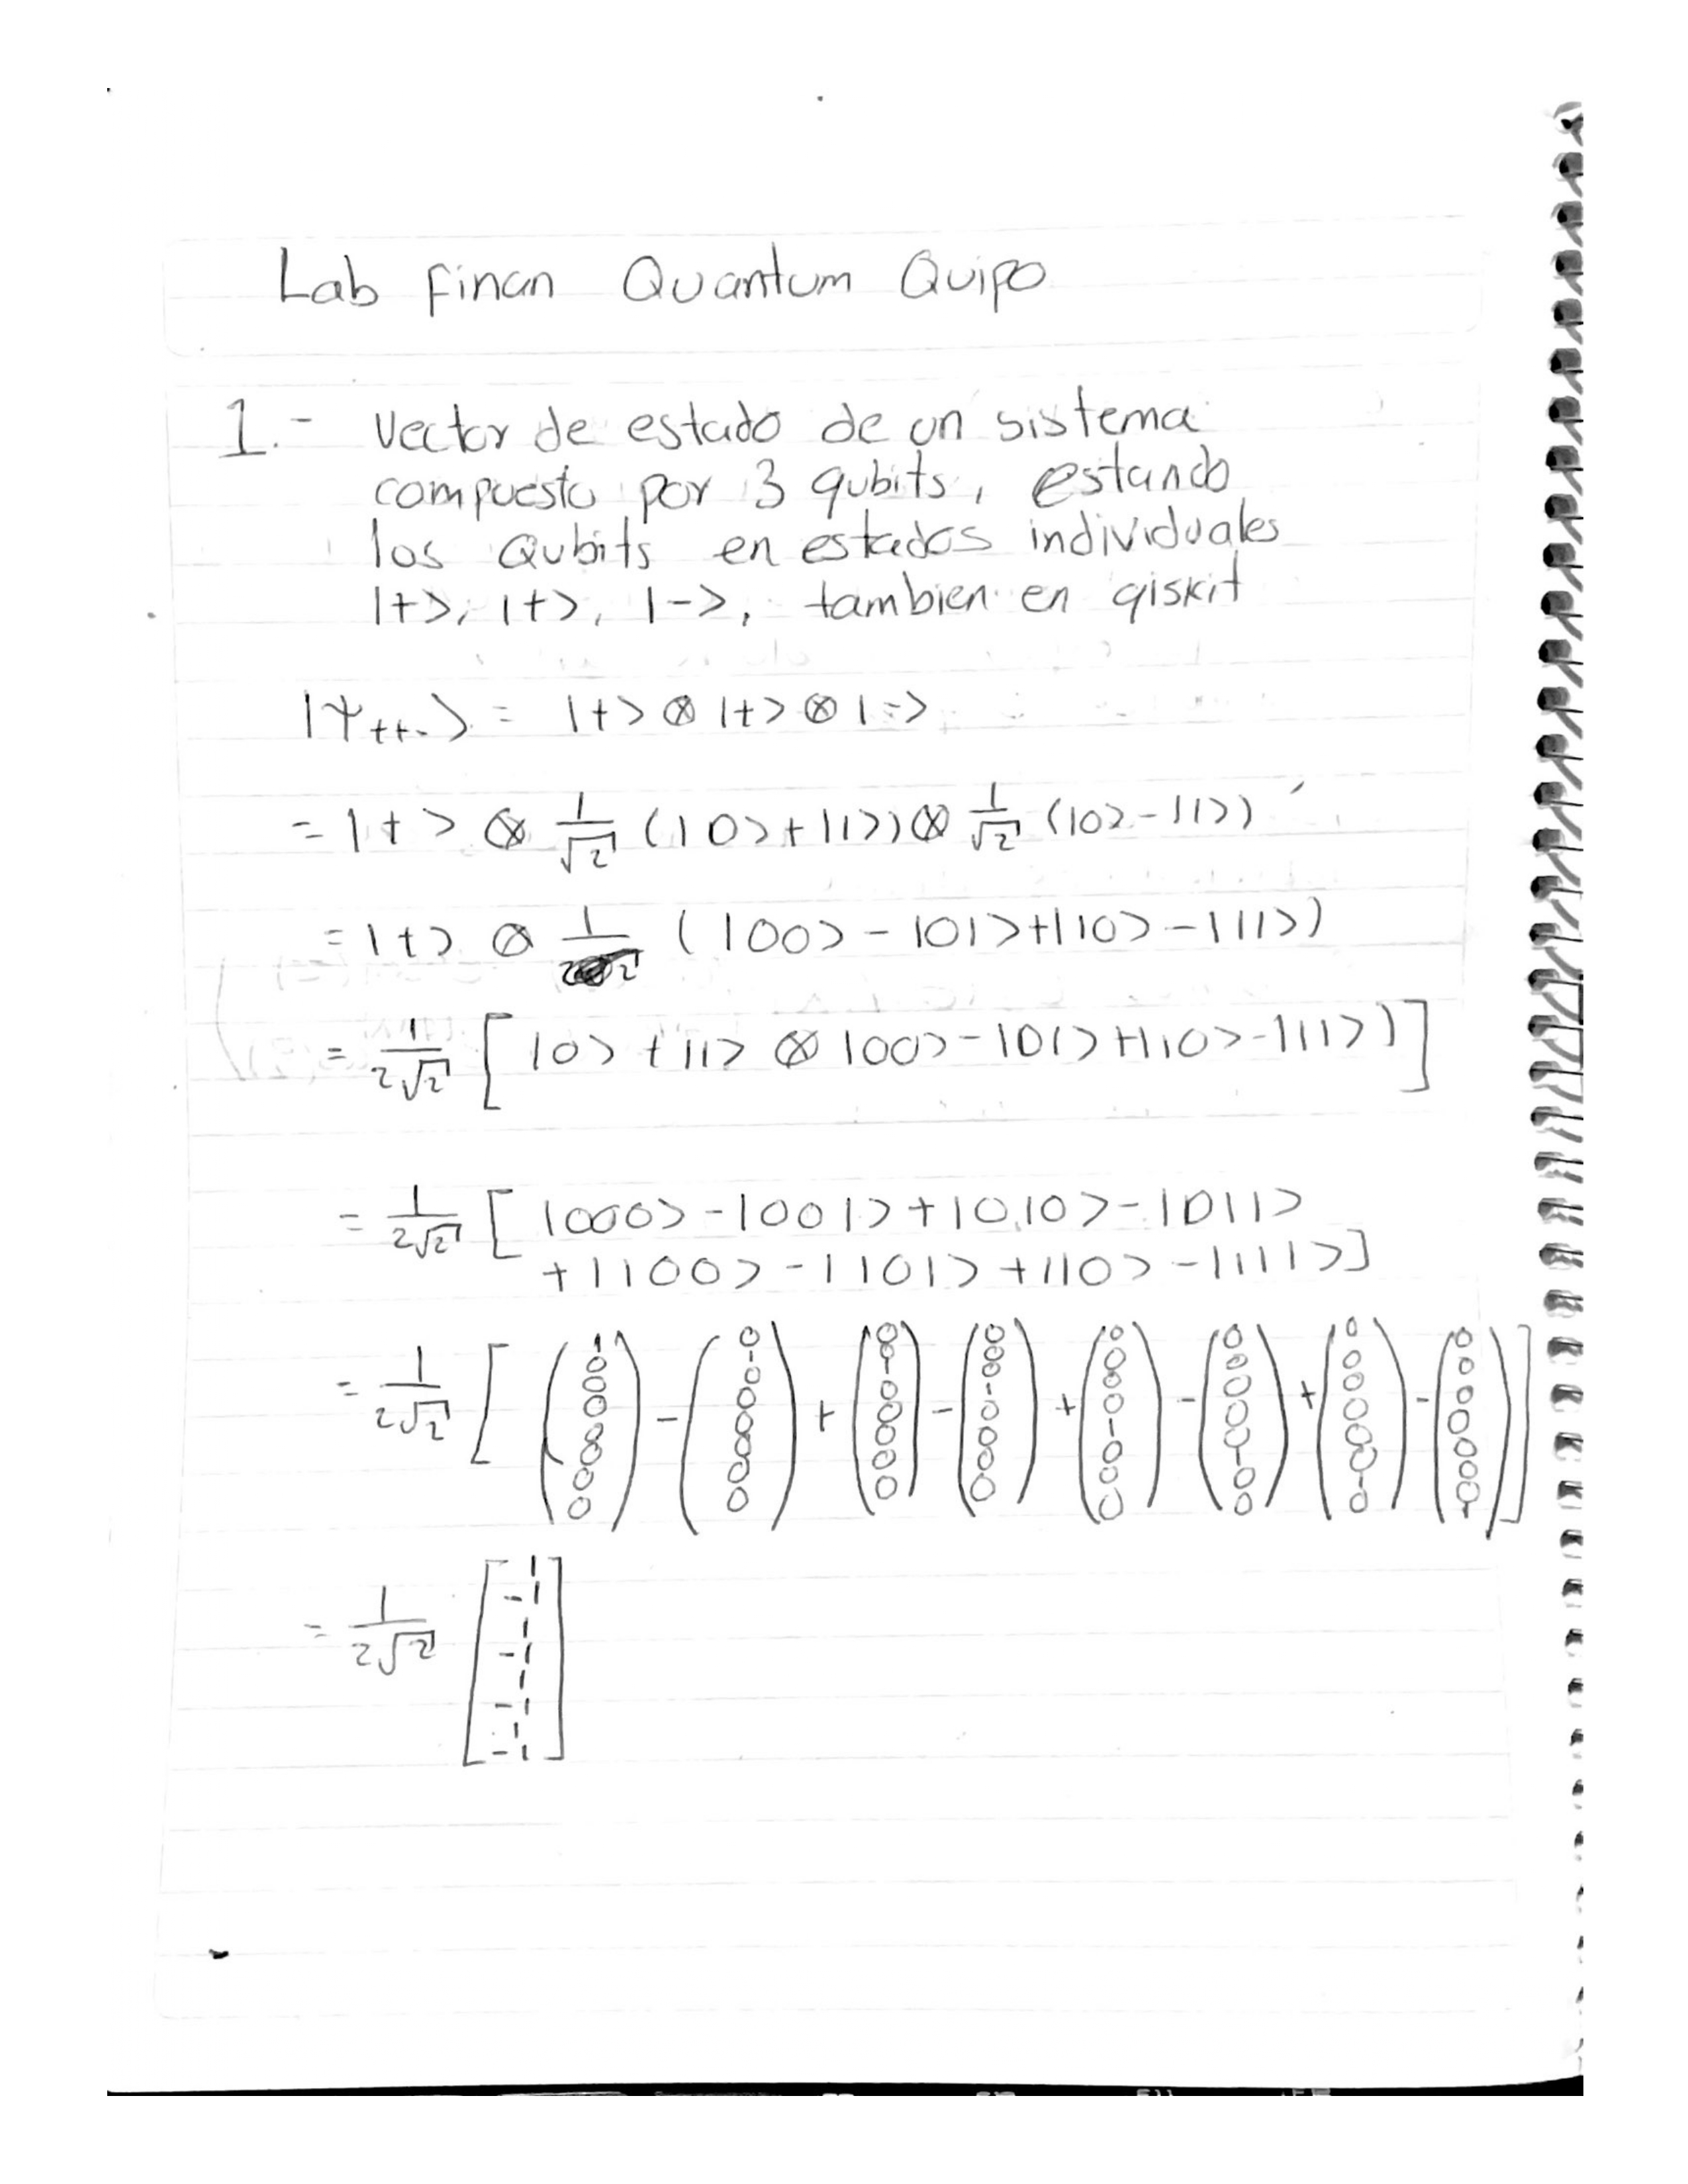

In [48]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q0 = QuantumRegister(3, 'q0')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q0, creg_c)

circuit.id(qreg_q0[2])
circuit.h(qreg_q0[2])
circuit.x(qreg_q0[0])
circuit.id(qreg_q0[1])
circuit.h(qreg_q0[1])
circuit.h(qreg_q0[0])
# Añadir medición parcial para el qubit central

#Si quiere verse el vector d bloch antes de la medicion borrar la linea siguiente y recompilar
#circuit.measure(qreg_q0[1], creg_c[1])

circuit.draw()


┌───┐┌───┐
q0_0: ┤ X ├┤ H ├
      ├───┤├───┤
q0_1: ┤ I ├┤ H ├
      ├───┤├───┤
q0_2: ┤ I ├┤ H ├
      └───┘└───┘
 c: 4/══════════

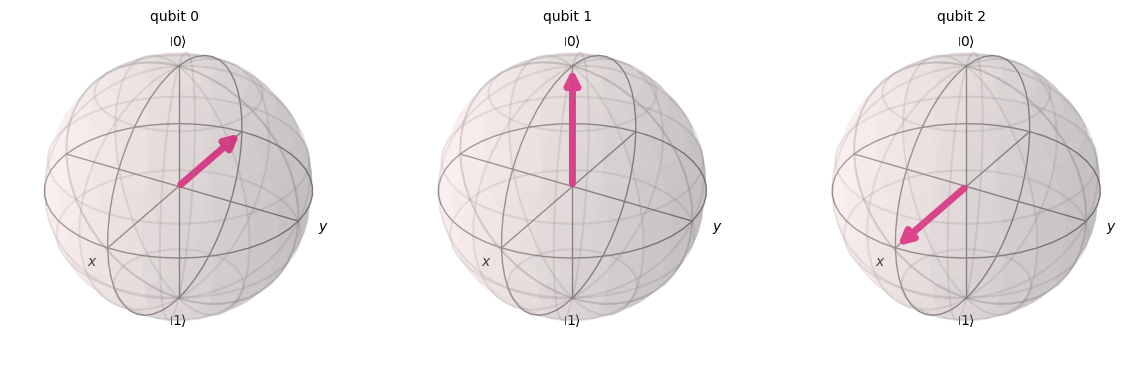

In [46]:
from qiskit.visualization import plot_bloch_multivector

# Simular para obtener el vector de estado
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(circuit, simulator)
result_pre = simulator.run(compiled_circuit).result()
statevector_pre = result_pre.get_statevector(circuit)

# Visualizar en la esfera de Bloch
plot_bloch_multivector(statevector_pre)

#Estado de los vectores despues de la medicion del qubit centrla

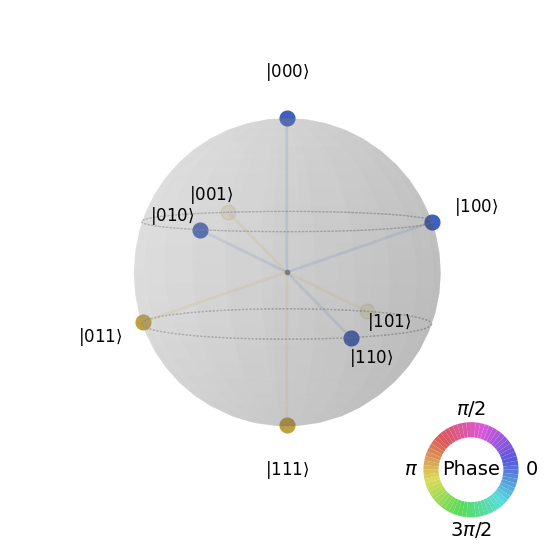

In [49]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(circuit)

#Estado de superposicion del circuito cuantico antes de la medicion

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(circuit).result()
answer = results.get_counts()

plot_histogram(answer)

# Problema 2

¿Cuántos qubits independientes tiene como mínimo el siguiente sistema?

<center>
<img src="https://raw.githubusercontent.com/tonymilla/QuantumScholars2023/main/imagenes/examen/q_spherequestion.png">


Considerando la Visualizacion de la esfera de Bloch y la espaciacion que se tiene en la visualizacion en los niveles puedo decir que este sistema cuenta con al menos 4 qubits

# Problema 3


¿Cómo se escribiría en notación de Dirac una compuerta CU3 desarrollalo e implementalo en qiskit para $\theta = \pi$, $\phi = \frac{\pi}{2}$ y $\lambda = \frac{7\pi}{2}$

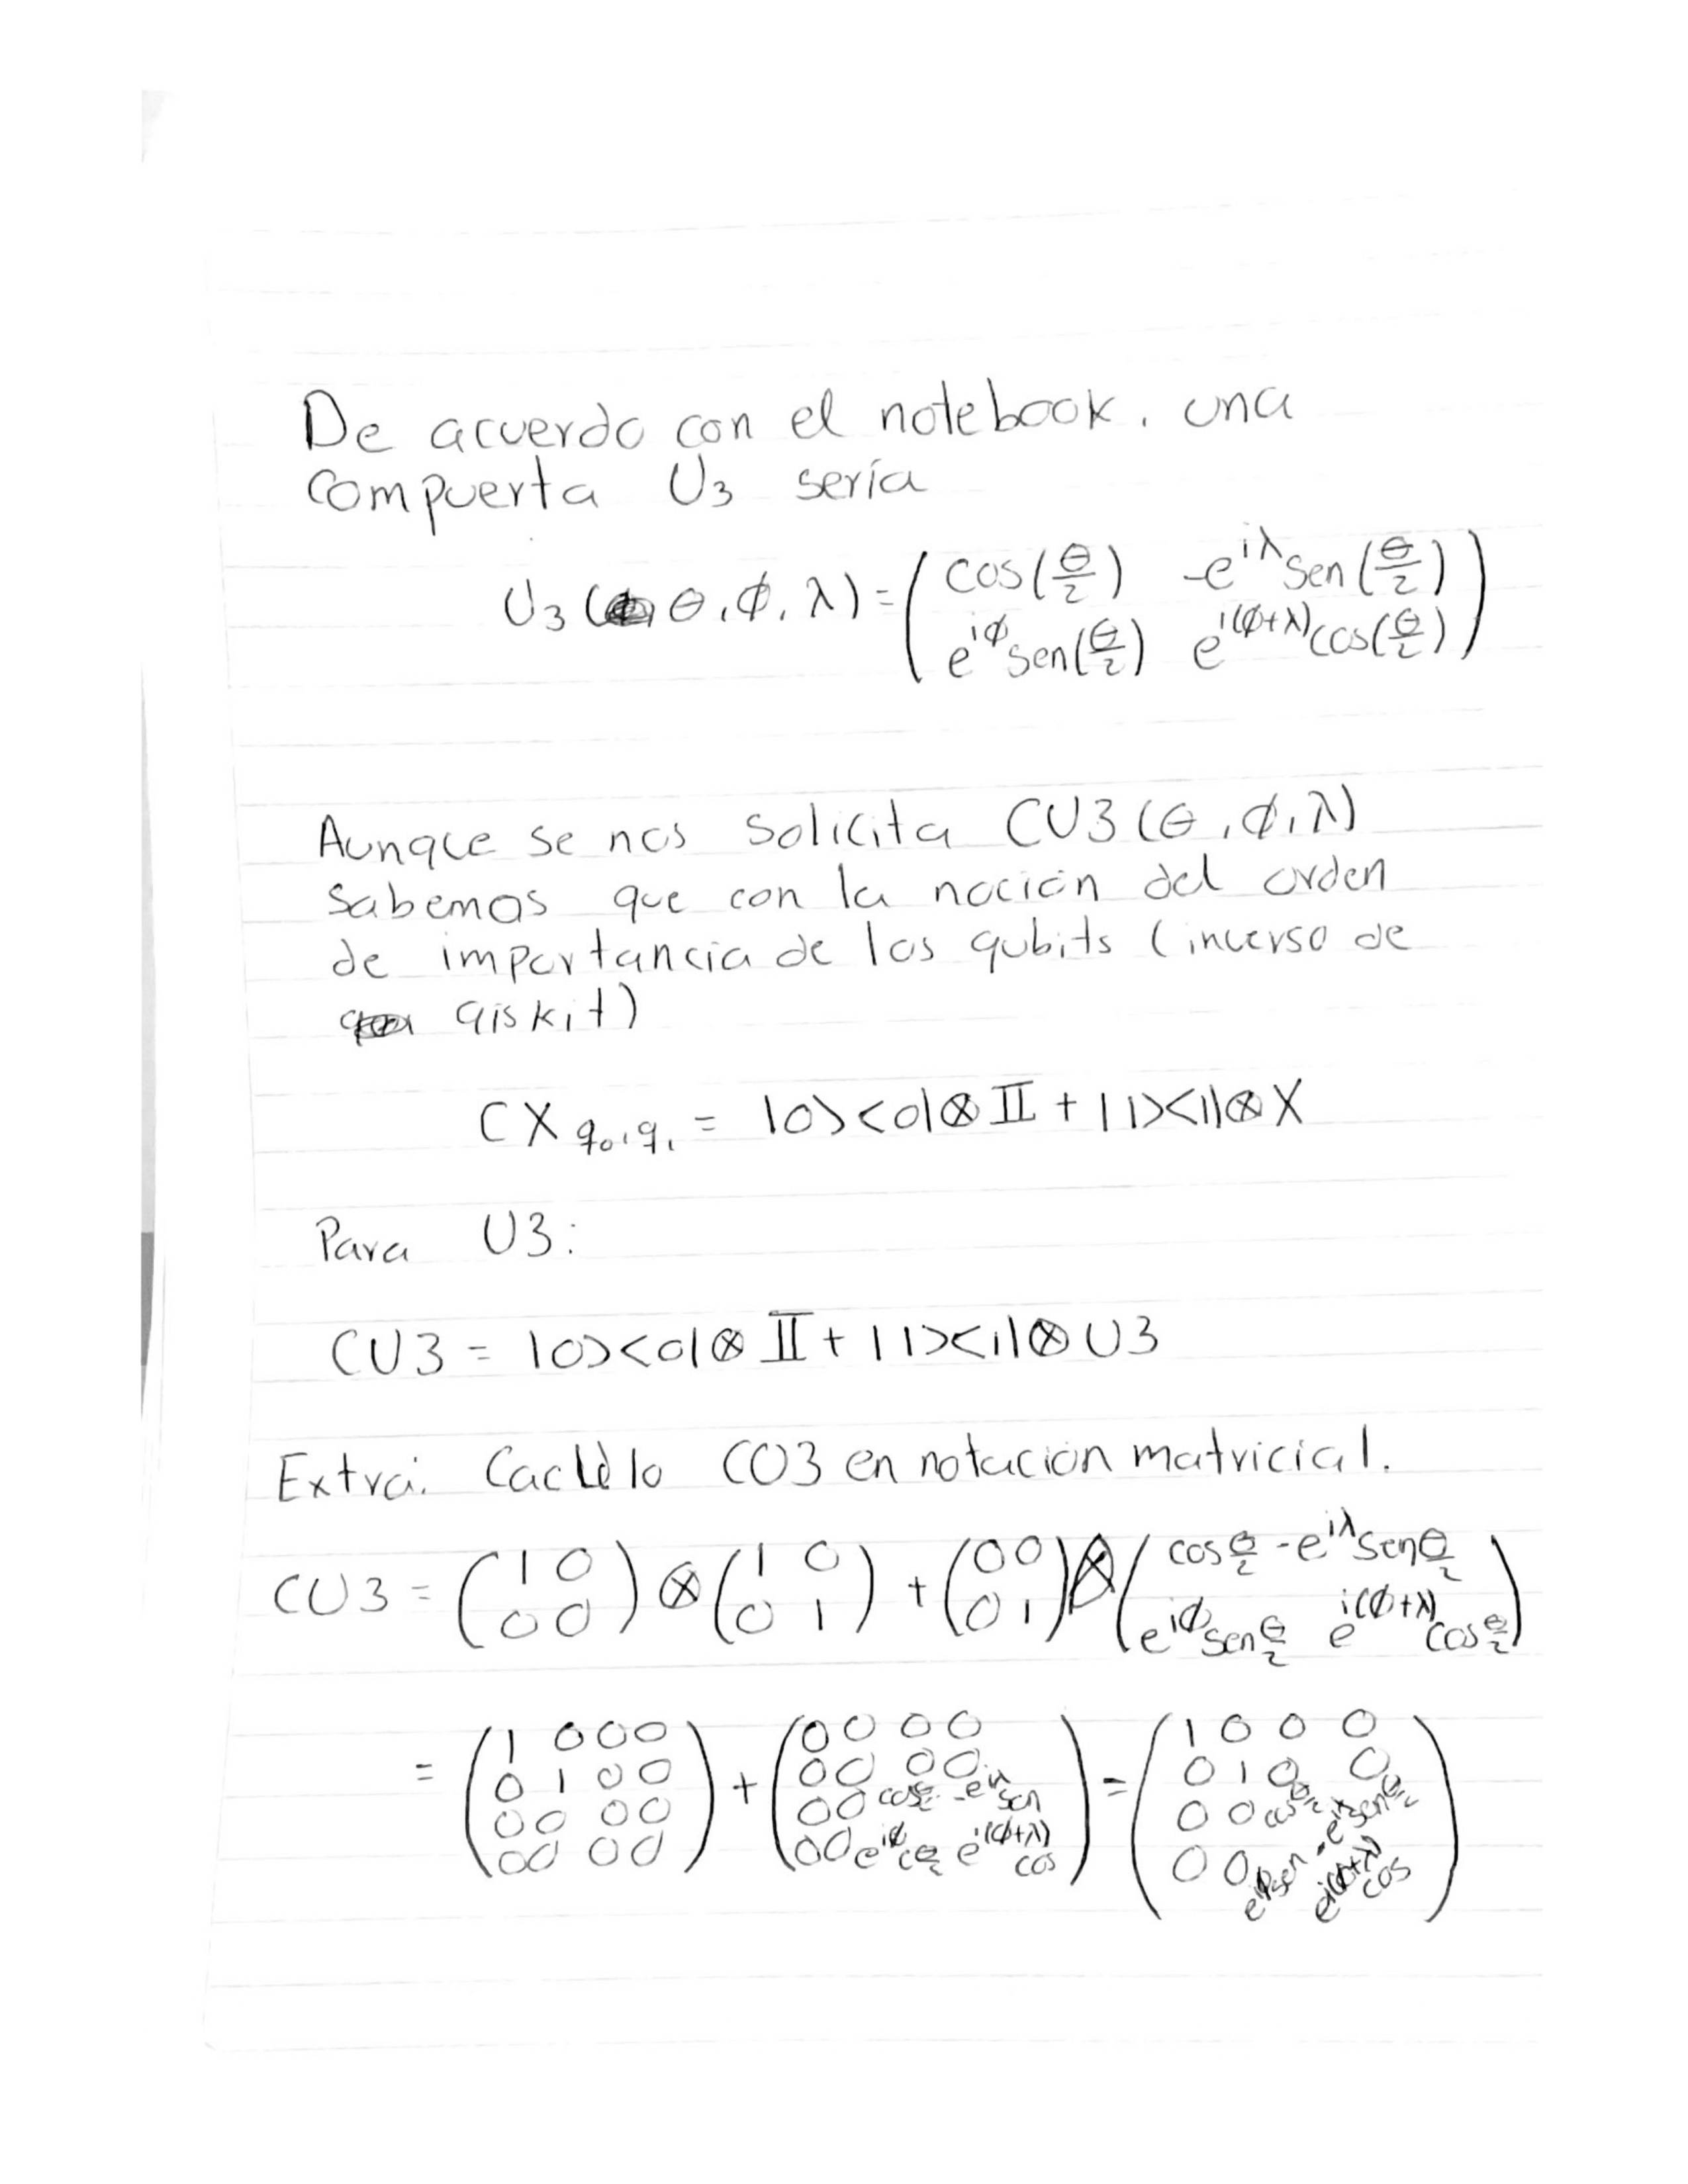

In [54]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from numpy import pi

# Definir el circuito
qc = QuantumCircuit(2)

# Valores dados
theta = pi
phi = pi/2
lambda_ = 7*pi/2

# Aplicar CU3
qc.cu(theta, phi, lambda_, 0, 0, 1)  # Asumiendo que el qubit 0 es el control y el qubit 1 es el objetivo

#El primer 0 hace mencion del angulo ganma que ene ste caso no se da por entendido, lo siguiente seria el qubit de control y el qubit objetivo
# Dibujar el circuito
qc.draw()


q_0: ─────────■─────────
     ┌────────┴────────┐
q_1: ┤ U(π,π/2,7π/2,0) ├
     └─────────────────┘

# Problema 4

A partir de la relación existente entre la operación (módulo 2) y el operador XOR ($\oplus$). Mostrar:

\begin{align}
\sum_{i=1}^n x_iz_i \pmod 2=x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n
\end{align}


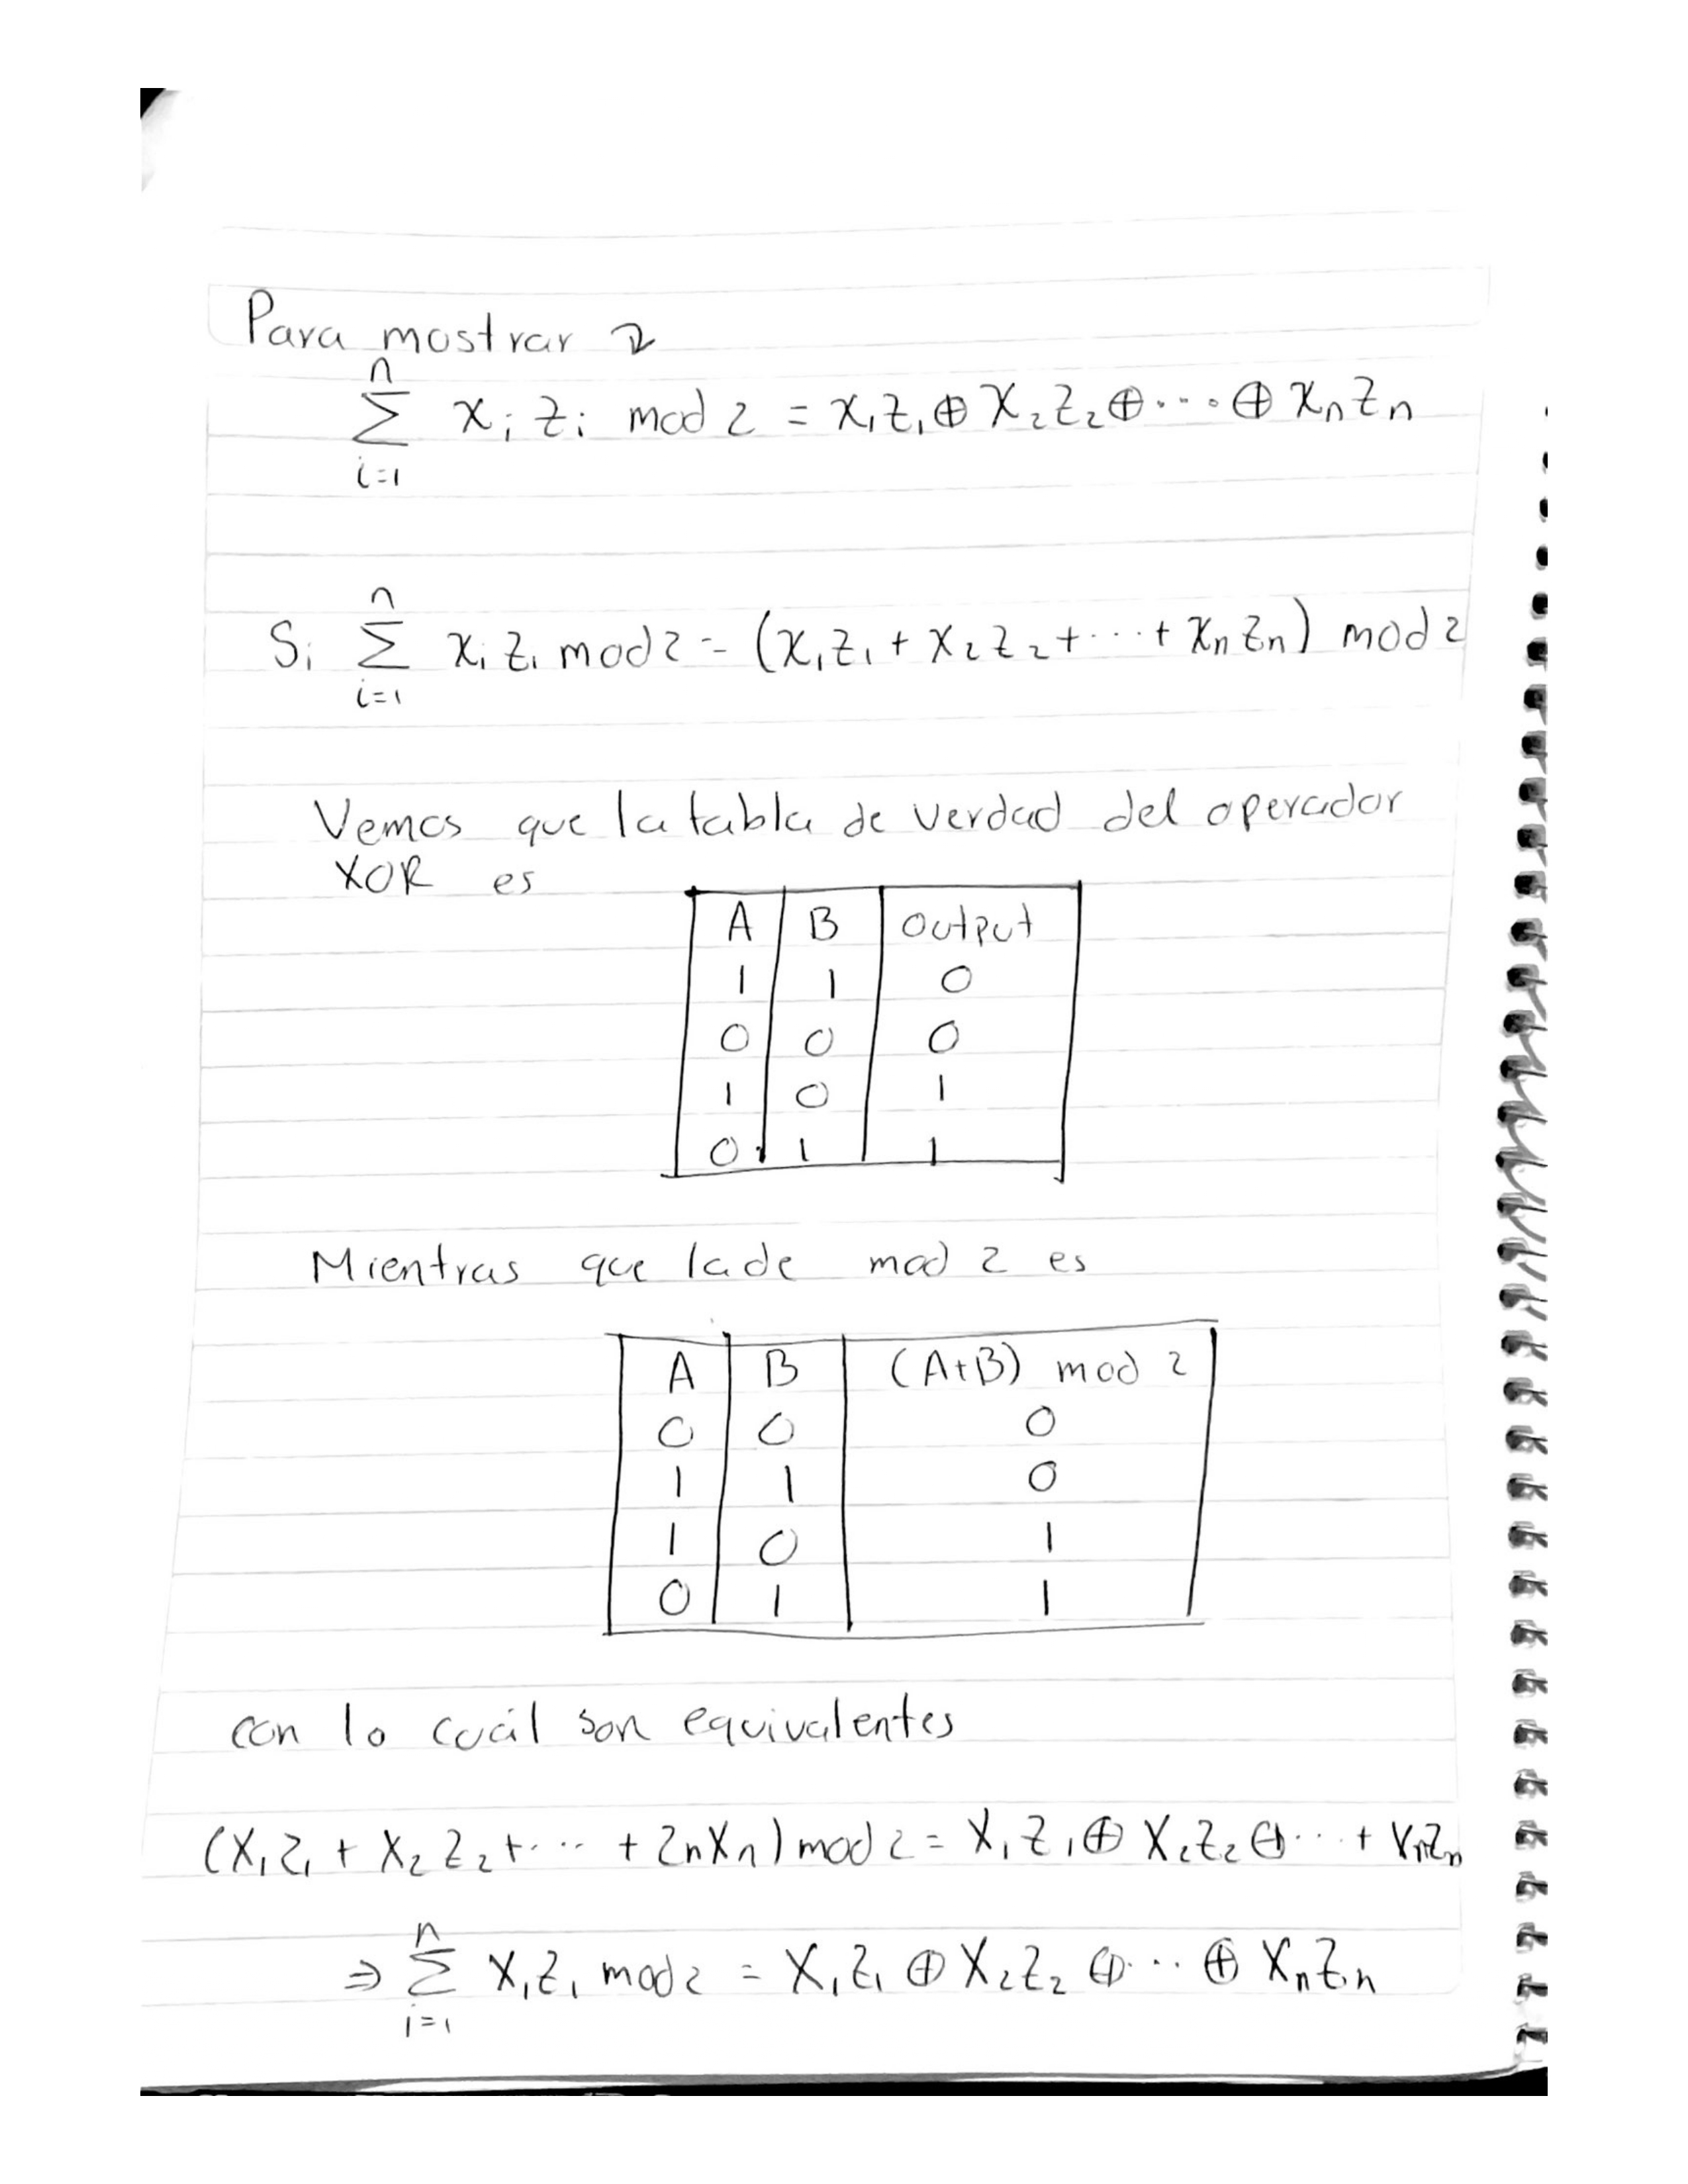

# Problema 5 Algoritmo de Deutsch-Jozsa

In [13]:
pip install qiskit-aer

In [14]:
def phase_oracle_corrected():
    qc = QuantumCircuit(3)

    # Para la entrada 011
    qc.x(0)
    qc.ccx(0, 1, 2)
    qc.x(0)

    # Para la entrada 010
    qc.x(2)
    qc.ccx(0, 1, 2)
    qc.x(2)

    # Para la entrada 100
    qc.x(1)
    qc.ccx(0, 1, 2)
    qc.x(1)

    # Para la entrada 101
    qc.ccx(0, 1, 2)

    return qc




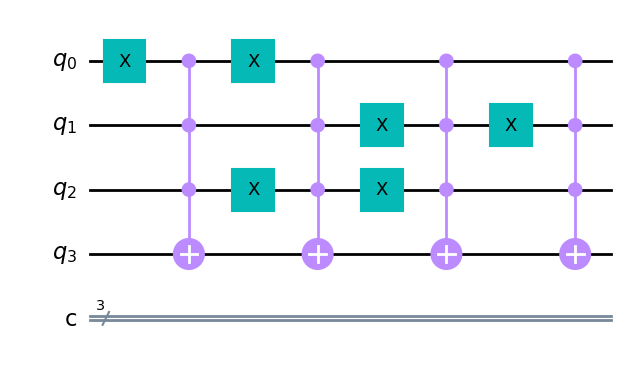

In [15]:
from qiskit import QuantumCircuit

def oracle_with_ancilla():
    qc = QuantumCircuit(4,3)

    # Para la entrada 011
    qc.x(0)
    qc.mcx([0, 1, 2], 3)
    qc.x(0)

    # Para la entrada 010
    qc.x(2)
    qc.mcx([0, 1, 2], 3)
    qc.x(2)

    # Para la entrada 100
    qc.x(1)
    qc.mcx([0, 1, 2], 3)
    qc.x(1)

    # Para la entrada 101
    qc.mcx([0, 1, 2], 3)

    return qc

# Probando el oráculo
oracle = oracle_with_ancilla()
oracle.draw('mpl')


In [20]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator



# Create the main circuit with 4 qubits (3 for input, 1 for output)
n = 3
qc = QuantumCircuit(4,3)

# Step 1: Initialization
# Apply H gates to the first n qubits
qc.x(3)
qc.h(3)

for x in range(3):
  qc.h(x)
qc.barrier()


# Step 2: Apply the Oracle
qc= qc.compose(oracle_with_ancilla())


qc.barrier()
# Step 3: Apply H gates again to the first n qubits
for x in range(3):
  qc.h(x)
qc.barrier()


# Measurement
qc.measure([0,1,2],[0,1,2])
qc.draw()


┌───┐      ░ ┌───┐     ┌───┐                          ░ ┌───┐ ░ ┌─┐      
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├──■─────────■─────────■───░─┤ H ├─░─┤M├──────
     ├───┤      ░ └───┘  │  └───┘  │  ┌───┐  │  ┌───┐  │   ░ ├───┤ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░────────■─────────■──┤ X ├──■──┤ X ├──■───░─┤ H ├─░──╫─┤M├───
     ├───┤      ░        │  ┌───┐  │  ├───┤  │  └───┘  │   ░ ├───┤ ░  ║ └╥┘┌─┐
q_2: ┤ H ├──────░────────■──┤ X ├──■──┤ X ├──■─────────■───░─┤ H ├─░──╫──╫─┤M├
     ├───┤┌───┐ ░      ┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐     ┌─┴─┐ ░ └───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░──────┤ X ├─────┤ X ├─────┤ X ├─────┤ X ├─░───────░──╫──╫──╫─
     └───┘└───┘ ░      └───┘     └───┘     └───┘     └───┘ ░       ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                      0  1  2

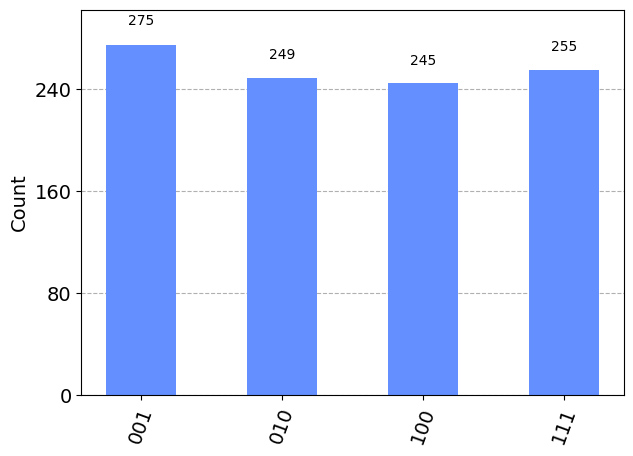

In [19]:
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(qc).result()
answer = results.get_counts()

plot_histogram(answer)

Como el estado 000 cuenta con 0 probabilidad, segun el Algoritmo de D.J., la funcion es balanceada

# Problema 6

En la construcción más simple posible de un oráculo balanceado, se utiliza la compuerta $CX$, la cual toma como objetivo el $(n+1)$-ésimo qubit del circuito y como control cada uno de los $n$ primeros qubits. Sin embargo, ¿es realmente necesario aplicar $CX$ a todos los $n$ primeros qubits, o podríamos prescindir de algunos y obtener igualmente un oráculo balanceado?

No es algo realmente necesario, todo depende del subconjunto de qubits que estes analizando, por ejemplo si nuestro sistema cuenta con 3 Qubits, si unicamente aplicamos una compuerta CX  en el primer qubit y de control el 4to, este nos brindaria los siguientes valores de funcion

\begin{align}
f(000) & = 0 \\
f(001) & = 1 \\
f(010) & = 0 \\
f(011) & = 1 \\
f(100) & = 0 \\
f(101) & = 1 \\
f(110) & = 0 \\
f(111) & = 1 \\
\end(aling)
Lo cual sigue siendo una funcion balanceada y unicamnete se implemento una compuerta CX a un qubit.

# Problema 7 Algoritmo de Groveer.


In [ ]:
from qiskit import QuantumCircuit

def grover_oracle():
    qc = QuantumCircuit(7,6)

    # Suponemos que cada bit de entrada ya representa la presencia o ausencia de una arista.
    # El grafo completo tendrá un 1 en cada bit.
    # Por lo tanto, simplemente multiplicamos todos los bits para marcar el estado del grafo completo.
    qc.mcx([0, 1, 2, 3, 4, 5], 6)  # Usamos un bit auxiliar para marcar el estado

    return qc


In [ ]:
def diffusion():
    qc = QuantumCircuit(7,6)

    # Aplicar H y X a todos los qubits
    qc.h(range(6))
    qc.x(range(6))

    # Aplicar MCX (multi-controlled X)
    qc.mcx([0, 1, 2, 3, 4], 5)

    # Devolver a los qubits con H y X
    qc.x(range(6))
    qc.h(range(6))

    return qc


In [ ]:
from qiskit import Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Definir el circuito
grover_circuit = QuantumCircuit(7, 6)
#grover_circuit.h(range(6))
grover_circuit = grover_circuit.compose(grover_oracle())
grover_circuit = grover_circuit.compose(diffusion())
grover_circuit.measure(range(5), range(5))
grover_circuit.draw()


┌───┐┌───┐     ┌───┐┌───┐┌─┐            
q_0: ──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├┤M├────────────
       │  ├───┤├───┤  │  ├───┤├───┤└╥┘┌─┐         
q_1: ──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫─┤M├─────────
       │  ├───┤├───┤  │  ├───┤├───┤ ║ └╥┘┌─┐      
q_2: ──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫──╫─┤M├──────
       │  ├───┤├───┤  │  ├───┤├───┤ ║  ║ └╥┘┌─┐   
q_3: ──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫──╫──╫─┤M├───
       │  ├───┤├───┤  │  ├───┤├───┤ ║  ║  ║ └╥┘┌─┐
q_4: ──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫──╫──╫──╫─┤M├
       │  ├───┤├───┤┌─┴─┐├───┤├───┤ ║  ║  ║  ║ └╥┘
q_5: ──■──┤ H ├┤ X ├┤ X ├┤ X ├┤ H ├─╫──╫──╫──╫──╫─
     ┌─┴─┐└───┘└───┘└───┘└───┘└───┘ ║  ║  ║  ║  ║ 
q_6: ┤ X ├──────────────────────────╫──╫──╫──╫──╫─
     └───┘                          ║  ║  ║  ║  ║ 
c: 6/═══════════════════════════════╩══╩══╩══╩══╩═
                                    0  1  2  3  4

In [ ]:
#mas refinado

from qiskit import Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Definir el circuito
grover_circuit = QuantumCircuit(7, 6)
grover_circuit.h(range(6))
grover_circuit = grover_circuit.compose(grover_oracle())
grover_circuit = grover_circuit.compose(diffusion())
grover_circuit = grover_circuit.compose(grover_oracle())
grover_circuit = grover_circuit.compose(diffusion())


grover_circuit.measure(range(5), range(5))
grover_circuit.draw()

┌───┐     ┌───┐┌───┐     ┌───┐┌───┐     ┌───┐┌───┐     ┌───┐┌───┐┌─┐      »
q_0: ┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├┤M├──────»
     ├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤└╥┘┌─┐   »
q_1: ┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫─┤M├───»
     ├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤ ║ └╥┘┌─┐»
q_2: ┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫──╫─┤M├»
     ├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤ ║  ║ └╥┘»
q_3: ┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫──╫──╫─»
     ├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤ ║  ║  ║ »
q_4: ┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫──╫──╫─»
     ├───┤  │  ├───┤├───┤┌─┴─┐├───┤├───┤  │  ├───┤├───┤┌─┴─┐├───┤├───┤ ║  ║  ║ »
q_5: ┤ H ├──■──┤ H ├┤ X ├┤ X ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ X ├┤ X ├┤ H ├─╫──╫──╫─»
     └───┘┌─┴─┐└───┘└───┘└───┘└───┘└───┘┌─┴─┐└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ »
q_6: ─────┤ X ├─────────────────────────┤ X ├──────────────────────────╫──╫──╫─»
          └───┘                         └───┘                          ║  ║  ║ »
c: 6/══════════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                       0  1  2 »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«     ┌─┐   
«q_3: ┤M├───
«     └╥┘┌─┐
«q_4: ─╫─┤M├
«      ║ └╥┘
«q_5: ─╫──╫─
«      ║  ║ 
«q_6: ─╫──╫─
«      ║  ║ 
«c: 6/═╩══╩═
«      3  4

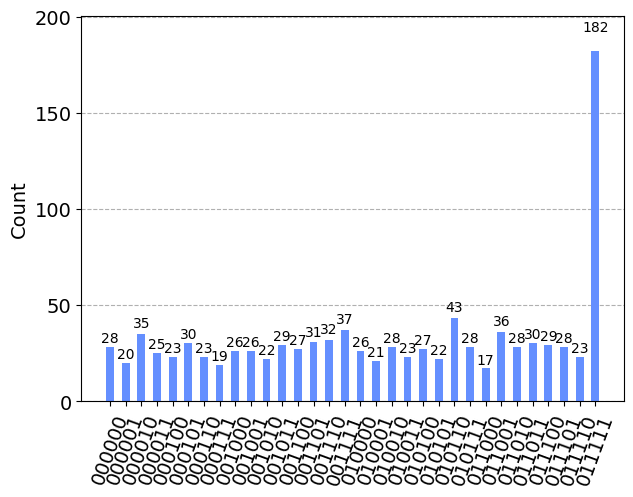

In [ ]:
# Ejecutar el circuito
backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(grover_circuit, backend)
qobj = assemble(t_qc)
results = execute(grover_circuit, backend=backend).result()
counts = results.get_counts()
plot_histogram(counts)

# Problema 8


En el algoritmo de Grover, determine el número de veces que debe ejercutarse el par $U_\omega U_f$ para que el estado final de nuestro circuito coincida con el Ket de estados deseados sabiendo que $x\in\{0,1\}^5$ y hay 4 estados que sastifacen las características de búsqueda.

Considerando la ecuacion para el calculo de k vueltas necesarias.

k = (math.pi/4) * math.sqrt(N/a)

Con N igual a 2^n, siendo n=5, por lo cual n = 32 o nodos  y a el numero de salidas validas que seria 4

Con lo cual al calcular se aproxima a k = 2 por lalimitacion de que estas deben de ser vueltas enteras.

# Problema 9 Transformada cuantica de fourier


In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
import math



# Create the main circuit with 4 qubits (3 for input, 1 for output)
n = 3
qc = QuantumCircuit(3,3)

# Step 1: Initialization
# Apply H gates to the first n qubits
qc.x(2)


qc.barrier()


qc.draw()


░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     └───┘ ░ 
c: 3/════════

In [ ]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)


In [ ]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit


In [ ]:
def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [ ]:

def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

In [ ]:
qc =qft(qc, n)
qc.measure_all()
qc.draw()

░                                               ┌───┐    ░ ┌─┐   »
   q_0: ──────░───────■────────────────────────────■──────────┤ H ├─X──░─┤M├───»
              ░       │                      ┌───┐ │P(1.5708) └───┘ │  ░ └╥┘┌─┐»
   q_1: ──────░───────┼───────────■──────────┤ H ├─■────────────────┼──░──╫─┤M├»
        ┌───┐ ░ ┌───┐ │P(0.7854)  │P(1.5708) └───┘                  │  ░  ║ └╥┘»
   q_2: ┤ X ├─░─┤ H ├─■───────────■─────────────────────────────────X──░──╫──╫─»
        └───┘ ░ └───┘                                                  ░  ║  ║ »
   c: 3/══════════════════════════════════════════════════════════════════╬══╬═»
                                                                          ║  ║ »
meas: 3/══════════════════════════════════════════════════════════════════╩══╩═»
                                                                          0  1 »
«           
«   q_0: ───
«           
«   q_1: ───
«        ┌─┐
«   q_2: ┤M├
«        └╥┘
«   c: 3/═╬═
«         ║ 
«meas: 3/═╩═
«         2

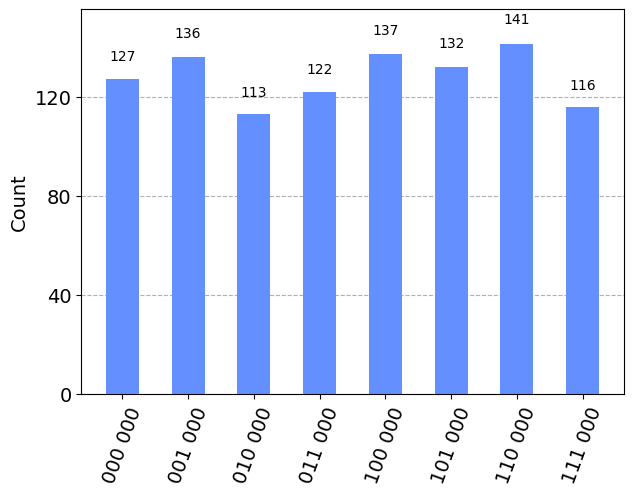

In [ ]:
# Ejecutar el circuito
backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, backend)
qobj = assemble(t_qc)
results = execute(qc, backend=backend).result()
counts = results.get_counts()
plot_histogram(counts)

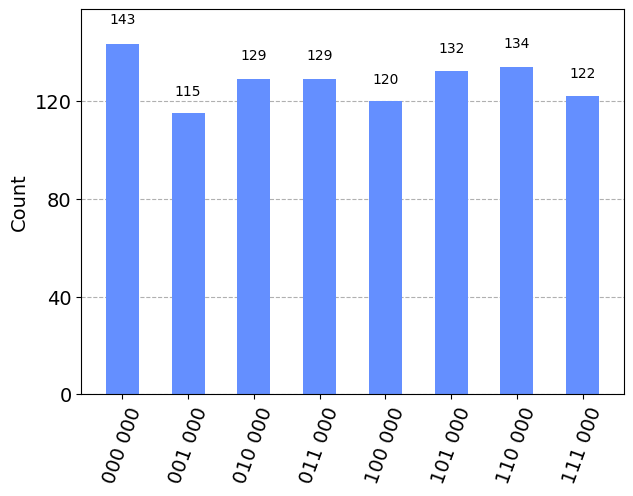

In [ ]:
def qft(circ, n):
    for j in range(n):
        circ.h(j)
        for m in range(j+1, n):
            circ.cp(pi/float(2**(m-j)), m, j)
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)

# Crear un circuito con 3 qubits
circ = QuantumCircuit(3)

# Inicializamos en el estado |100>
circ.x(2)

# Aplicamos QFT
qft(circ, 3)

# Simulamos

backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, backend)
qobj = assemble(t_qc)
results = execute(qc, backend=backend).result()
counts = results.get_counts()
plot_histogram(counts)


# Problema 10

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
import math



# Create the main circuit with 4 qubits (3 for input, 1 for output)
n = 3
qc = QuantumCircuit(3,3)

# Step 1: Initialization
# Apply H gates to the first n qubits
qc.x(0)
qc.x(1)


qc.barrier()


qc.draw()


┌───┐ ░ 
q_0: ┤ X ├─░─
     ├───┤ ░ 
q_1: ┤ X ├─░─
     └───┘ ░ 
q_2: ──────░─
           ░ 
c: 3/════════

In [ ]:
qc=qft(qc, n)

qc.draw()

┌───┐ ░                                               ┌───┐   
q_0: ┤ X ├─░───────■────────────────────────────■──────────┤ H ├─X─
     ├───┤ ░       │                      ┌───┐ │P(1.5708) └───┘ │ 
q_1: ┤ X ├─░───────┼───────────■──────────┤ H ├─■────────────────┼─
     └───┘ ░ ┌───┐ │P(0.7854)  │P(1.5708) └───┘                  │ 
q_2: ──────░─┤ H ├─■───────────■─────────────────────────────────X─
           ░ └───┘                                                 
c: 3/══════════════════════════════════════════════════════════════

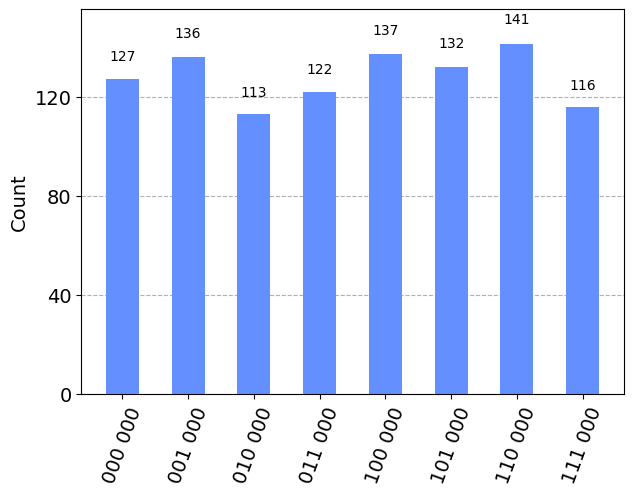

In [ ]:
backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, backend)
qobj = assemble(t_qc)
results = execute(qc, backend=backend).result()
plot_histogram(counts)
